# Importações

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#pip install yellowbrick



In [ ]:
data_base = pd.read_csv('credit_data.csv')
#print(data_base.head(10))
#print(data_base.tail(10))
#print(data_base.describe())




# Conhecendo os Dados

In [ ]:
data_base[data_base['age']<=0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


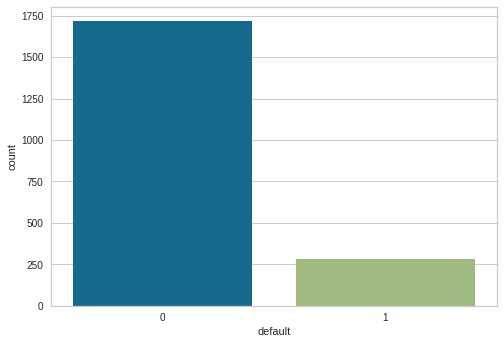

In [ ]:
sns.countplot(x = data_base['default']);

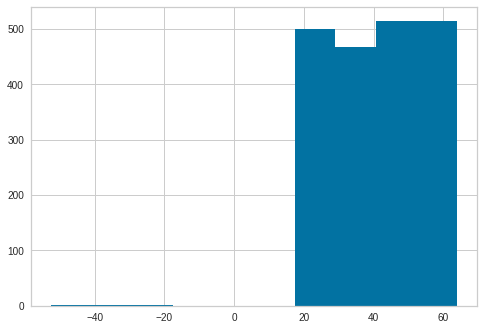

In [ ]:
plt.hist(x = data_base['age']);

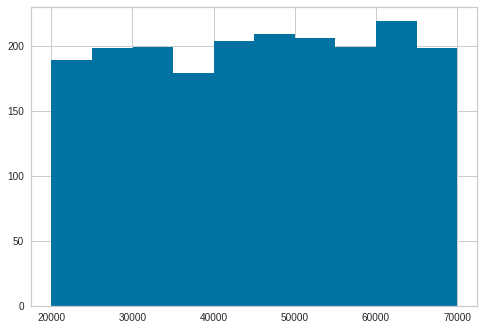

In [ ]:
plt.hist(x = data_base['income']);

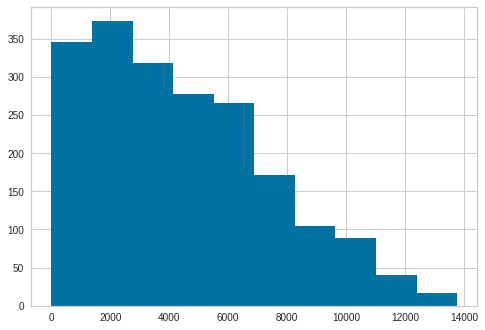

In [ ]:
plt.hist(x = data_base['loan']);

In [ ]:
grafico = px.scatter_matrix(data_base, dimensions=['age', 'income', 'loan'], color = 'default')
grafico.show()

In [ ]:
data_base.loc[data_base['age'] < 0]
#ou
data_base[data_base['age'] < 0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


Para tratar os dados inconsistentente podemos apagar a coluno inteira ou apagar o dado ou colocar um valor aproximado de acordo com os outros dados


In [ ]:
# Apagar a coluna inteira (de todos os registros da base de dados)
data_base2 = data_base.drop('age', axis = 1)
data_base2



,clientid,income,loan,default
0,1,66155.925095,8106.532131,0
1,2,34415.153966,6564.745018,0
2,3,57317.170063,8020.953296,0
3,4,42709.534201,6103.642260,0
4,5,66952.688845,8770.099235,1
...,...,...,...,...
1995,1996,59221.044874,1926.729397,0
1996,1997,69516.127573,3503.176156,0
1997,1998,44311.449262,5522.786693,1
1998,1999,43756.056605,1622.722598,0


In [ ]:
# Apagar somente os registros com valores inconsistentes
data_base3 = data_base.drop(data_base[data_base['age'] < 0].index)
data_base3

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [ ]:
# Preencher os valores inconsistente manualmente
data_base.mean()
data_base['age'].mean()
data_base['age'][data_base['age'] > 0].mean()

data_base.loc[data_base['age'] < 0, 'age'] = 40.92
data_base.loc[data_base['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
data_base.head(27)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


Tratamento de valores faltantes

In [ ]:
data_base.isnull()


,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
data_base.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [ ]:
data_base.loc[pd.isnull(data_base['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
#preenchendo valores NA no 'age' com a média
#inplace = gravar no objeto sem precisar data_base
data_base['age'].fillna(data_base['age'].mean(), inplace = True)

In [ ]:
#checando se esta ok
data_base.loc[pd.isnull(data_base['age'])]

,clientid,income,age,loan,default


In [ ]:
data_base.loc[(data_base['clientid'] == 29) | (data_base['clientid'] == 31) | (data_base['clientid'] == 32)]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


ou

In [ ]:
data_base.loc[data_base['clientid'].isin([29, 31, 32])]

,clientid,income,age,loan,default
28,29,59417.805406,40.927689,2082.625938,0
30,31,48528.852796,40.927689,6155.784670,0
31,32,23526.302555,40.927689,2862.010139,0


# Divisão entre previsores e classe

In [ ]:
type(data_base)
X_credit = data_base.iloc[:, 1:4].values #todas as linhas: somente as colunas que quero

In [ ]:
X_credit,type(X_credit)

(array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
        [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
        [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
        ...,
        [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
        [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
        [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]]), numpy.ndarray)

In [ ]:
y_credit = data_base.iloc[:, 4].values

In [ ]:
y_credit,type(y_credit)

(array([0, 0, 0, ..., 1, 0, 0]), numpy.ndarray)

# Normalizando os valores (opcional)
nao recomendo se quiser entender visualmente a arvore

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)

In [ ]:
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

# Dividindo Treinamento e Teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state = 0)

In [ ]:
X_credit_treinamento.shape,y_credit_treinamento.shape,X_credit_teste.shape, y_credit_teste.shape

((1500, 3), (1500,), (500, 3), (500,))

# Aplicação do algoritmo




In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
tree_credit_data = DecisionTreeClassifier(criterion = 'entropy', random_state=0) #Random_state serve pra colocar uma seed e sempre gerar o mesmo resultado
tree_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsoes = tree_credit_data.predict(X_credit_teste)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
y_credit_teste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Testando Acurácia

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(y_credit_teste, previsoes)

0.982

In [ ]:
print((accuracy_score(y_credit_teste, previsoes)*100),'%')

98.2 %


## Formas de interpretar o resultado

In [ ]:
confusion_matrix(y_credit_teste, previsoes)

array([[430,   6],
       [  3,  61]])

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

0.982

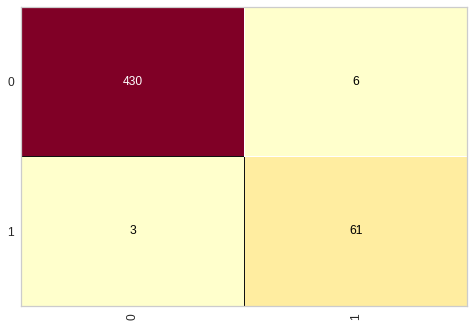

In [ ]:
cm = ConfusionMatrix(tree_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [ ]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



Podemos Concluir que para clientes que **pagam** o emprestimo o algoritmo teve uma acurácia de **91%** e clientes que **não pagam** teve uma acurácia de **99%**


no total dos casos **98%**



# Gerando a Arvore

In [ ]:
tree_credit_data.classes_
#pagou o emprestimo = 0
#nao pagou o emprestimo = 1

array([0, 1])

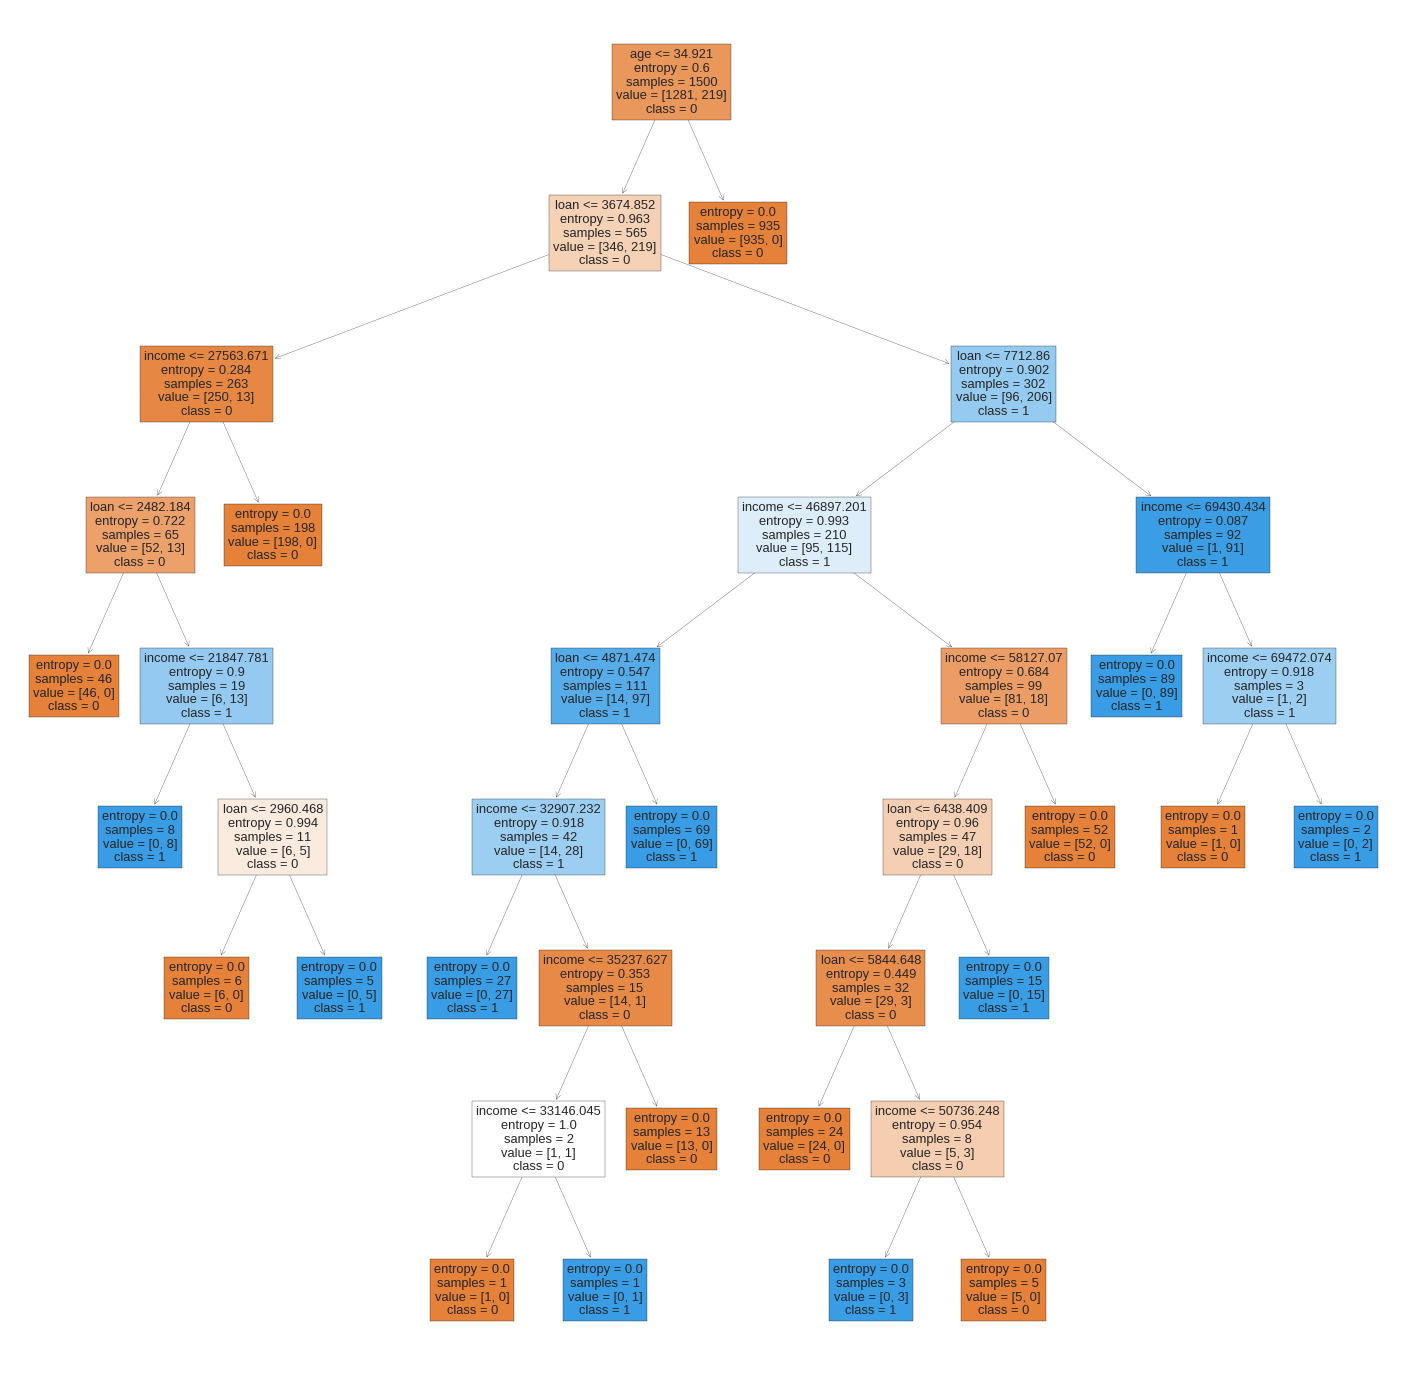

In [ ]:
from sklearn import tree
previsores = ['income','age','loan'] # na sequencia
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(25,25))
tree.plot_tree(tree_credit_data,feature_names=previsores,class_names=('0','1'),filled=True)
fig.savefig('tree_credit.png')